In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.optimizers import Adam

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping


sns.set_style("whitegrid")

In [ ]:
#View the data columns
df = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19_Unified-Dataset/master/COVID-19_LUT.csv")
df.head()

NameError: ignored

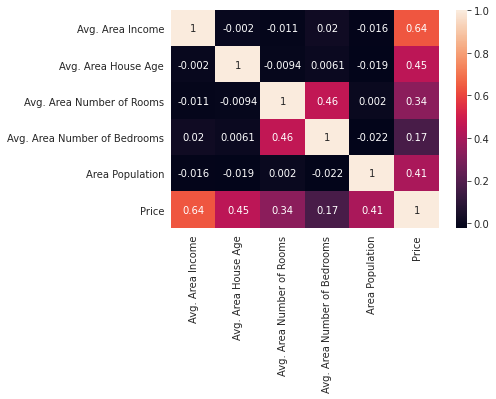

In [ ]:
#Heatmap to see what columns have the most correlation
sns.heatmap(df.corr(), annot=True)

In [ ]:
#Splitting train and test data
X = df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms', 'Area Population']]
Y = df['Price']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=68)

In [ ]:
#Scaling X and Y data
maxPrice = Y_train.max()
Y_train = Y_train/maxPrice
Y_test = Y_test/maxPrice
print(Y_test);

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)



3627    0.449427
305     0.485008
2996    0.613046
1950    0.597156
159     0.428199
          ...   
1777    0.594665
4498    0.367533
4888    0.629868
4813    0.386308
1368    0.577188
Name: Price, Length: 1000, dtype: float64


In [ ]:
#Building the model
model = Sequential()

model.add(Dense(15, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(10, activation="relu"))
model.add(Dense(1, activation="linear"))

In [ ]:
model.compile(loss="mean_squared_error", optimizer="adam")

#Training the model
print("[INFO] training model...")

model.fit(x=X_train, y=Y_train,
	validation_data=(X_test, Y_test),
epochs=10)
#started overfitting after 10

[INFO] training model...
Epoch 1/10
125/125 [==============================] - 0s 2ms/step - loss: 0.0137 - val_loss: 0.0064
Epoch 2/10
125/125 [==============================] - 0s 1ms/step - loss: 0.0064 - val_loss: 0.0058
Epoch 3/10
125/125 [==============================] - 0s 1ms/step - loss: 0.0044 - val_loss: 0.0066
Epoch 4/10
125/125 [==============================] - 0s 1ms/step - loss: 0.0031 - val_loss: 0.0083
Epoch 5/10
125/125 [==============================] - 0s 1ms/step - loss: 0.0024 - val_loss: 0.0070
Epoch 6/10
125/125 [==============================] - 0s 1ms/step - loss: 0.0020 - val_loss: 0.0083
Epoch 7/10
125/125 [==============================] - 0s 1ms/step - loss: 0.0019 - val_loss: 0.0107
Epoch 8/10
125/125 [==============================] - 0s 1ms/step - loss: 0.0018 - val_loss: 0.0100
Epoch 9/10
125/125 [==============================] - 0s 1ms/step - loss: 0.0018 - val_loss: 0.0101
Epoch 10/10
125/125 [==============================] - 0s 1ms/step - loss: 

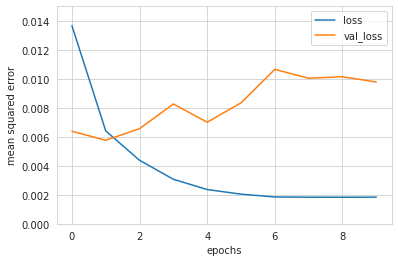

In [ ]:
#Plotting the loss against the val_loss 

plt.plot(model.history.history['loss'], label='loss')
plt.plot(model.history.history['val_loss'], label='val_loss')
plt.xlabel('epochs')
plt.ylabel('mean squared error')
limits = [0, 0.015]
plt.ylim(limits)
plt.legend()


In [ ]:
#Getting the model predictions on the test set
test_predictions = model.predict(X_test)
temp_predictions = test_predictions
test_predictions = pd.Series(test_predictions.reshape(1000))
test_predictions


0      0.377600
1      0.426843
2      0.524325
3      0.446345
4      0.390339
         ...   
995    0.570595
996    0.216356
997    0.503062
998    0.238383
999    0.513257
Length: 1000, dtype: float32

In [ ]:
#Getting the real price predictions and comparing them with the model predictions
temp_predictions = pd.DataFrame(Y_test.values, columns=['True Y value',])
temp_predictions = pd.concat([temp_predictions, test_predictions],axis=1)
temp_predictions.columns = ['True Y value', 'Model Prediction']
temp_predictions

,True Y value,Model Prediction
0,0.449427,0.377600
1,0.485008,0.426843
2,0.613046,0.524325
3,0.597156,0.446345
4,0.428199,0.390339
...,...,...
995,0.594665,0.570595
996,0.367533,0.216356
997,0.629868,0.503062
998,0.386308,0.238383


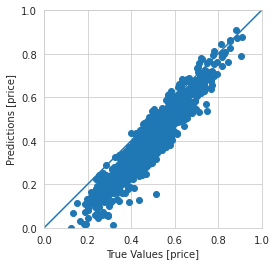

In [ ]:
#Scatter plot of the model predictions and the real price predictions
axes = plt.axes(aspect='equal')
plt.scatter(temp_predictions['True Y value'], temp_predictions['Model Prediction'])
plt.xlabel('True Values [price]')
plt.ylabel('Predictions [price]')
limits = [0, 1]
plt.xlim(limits)
plt.ylim(limits)
plt.plot(limits, limits)